# Weather Prediction Using Machine Learning

In this notebook, I have developed a system to predict the weather. The dataset taken is for JFK airport Newyork.

Using ridge regression algorithm , i have trained the model to predict the next day weather

In [586]:
#importing pandas and numpy for data analaysis and data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [587]:
#loading the dataset
weather = pd.read_csv("weather.csv" , index_col = "DATE")
#index_col = "DATE" makes sure that the date column is set as index column

weather

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,9.62,NaN,NaN,0.08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,12.08,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",NaN,NaN,14.99,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

We can see that there are empty columns in the dataset. So first we have to do data cleaning in order to make the data suitable for training.

### Null Percentage

To clean the data, first we have to remove the null columns and null values in the data. So by using pandas, we will first calculate the null percentage of each column

In [588]:
#calculating the number of null values in each column

number_of_null_values = weather.apply(pd.isnull).sum()

number_of_null_values

STATION        0
NAME           0
ACMH        9672
ACSH        9671
AWND        5116
FMTM        9163
PGTM        7018
PRCP           0
SNOW           0
SNWD           2
TAVG       13123
TMAX           0
TMIN           0
TSUN       19256
WDF1        9676
WDF2        9618
WDF5        9701
WDFG       14166
WDFM       19286
WESD       13216
WSF1        9673
WSF2        9618
WSF5        9702
WSFG       11824
WSFM       19286
WT01       12155
WT02       18034
WT03       18000
WT04       18951
WT05       18923
WT06       19106
WT07       19179
WT08       15371
WT09       19147
WT11       19273
WT13       17102
WT14       18400
WT15       19245
WT16       12710
WT17       19227
WT18       18120
WT21       19282
WT22       19238
WV01       19286
dtype: int64

In [589]:
#Then, dividing it with the number of rows of get the percentage of null values of each column

null_percentage = (number_of_null_values / weather.shape[0]) * 100
null_percentage

STATION     0.000000
NAME        0.000000
ACMH       50.147768
ACSH       50.142583
AWND       26.525639
FMTM       47.508685
PGTM       36.387204
PRCP        0.000000
SNOW        0.000000
SNWD        0.010370
TAVG       68.040649
TMAX        0.000000
TMIN        0.000000
TSUN       99.839270
WDF1       50.168507
WDF2       49.867787
WDF5       50.298128
WDFG       73.448437
WDFM       99.994815
WESD       68.522839
WSF1       50.152953
WSF2       49.867787
WSF5       50.303313
WSFG       61.305543
WSFM       99.994815
WT01       63.021724
WT02       93.503396
WT03       93.327112
WT04       98.257894
WT05       98.112718
WT06       99.061544
WT07       99.440037
WT08       79.696168
WT09       99.274122
WT11       99.927412
WT13       88.671126
WT14       95.401047
WT15       99.782237
WT16       65.899310
WT17       99.688910
WT18       93.949292
WT21       99.974076
WT22       99.745943
WV01       99.994815
dtype: float64

Now that we have a null percentage of each column, we have to remove those columns that a very high null percentage. Here, I have chosen a cut off of 5% and all the columns that have a null percentage greater than 5% will be removed from my dataset

In [590]:
columns_to_keep = weather.columns[null_percentage < 5]
columns_to_keep

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [591]:
weather = weather[columns_to_keep].copy()

In [592]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


Now that we have a dataset with less null values, Lets check the null percentage of each column again, and using ffill(), fill those null values. Although it may give some faulty data, but our orignal dataset is large enough to ignore that problem

In [593]:
number_of_null_values = weather.apply(pd.isnull).sum()
null_percentage = (number_of_null_values / weather.shape[0]) * 100
null_percentage

STATION    0.00000
NAME       0.00000
PRCP       0.00000
SNOW       0.00000
SNWD       0.01037
TMAX       0.00000
TMIN       0.00000
dtype: float64

We can see that only SNOWD column has missing values

In [594]:
weather = weather.ffill()

In [595]:
number_of_null_values = weather.apply(pd.isnull).sum()
null_percentage = (number_of_null_values / weather.shape[0]) * 100
null_percentage

STATION    0.0
NAME       0.0
PRCP       0.0
SNOW       0.0
SNWD       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

Now we have cleaned our data and removed all the null values

### Data Analysis

Now that we have cleaned our data, we will analyze it , to prepare the data for training

In [596]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX         int64
TMIN         int64
dtype: object

In [597]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [598]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
               '2022-10-16', '2022-10-17', '2022-10-18', '2022-10-19',
               '2022-10-20', '2022-10-21'],
              dtype='datetime64[ns]', name='DATE', length=19287, freq=None)

In [599]:
weather.head()

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21


If we look at our dataset, we can see that it has following columns:


*   Station ID
*   Name of the station
*   Precipitation Rate
*   Snow Rate
*   Snow Depth Rate
*   Maximum Temperature that day
*   Minimum Temperature that day

Here, we don't have a target column that we can give to our model (supervised Learning) to give more predictions.

Since we are predicting Tomorrow's weather, we can create a target column, by using TMAX values of next day








In [600]:
weather["target"] = weather.shift(-1)["TMAX"]
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


But this also gives a null value in the last column, we can get rid of that using ffill()

In [601]:
weather = weather.ffill()
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [602]:
weather.columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'target'], dtype='object')

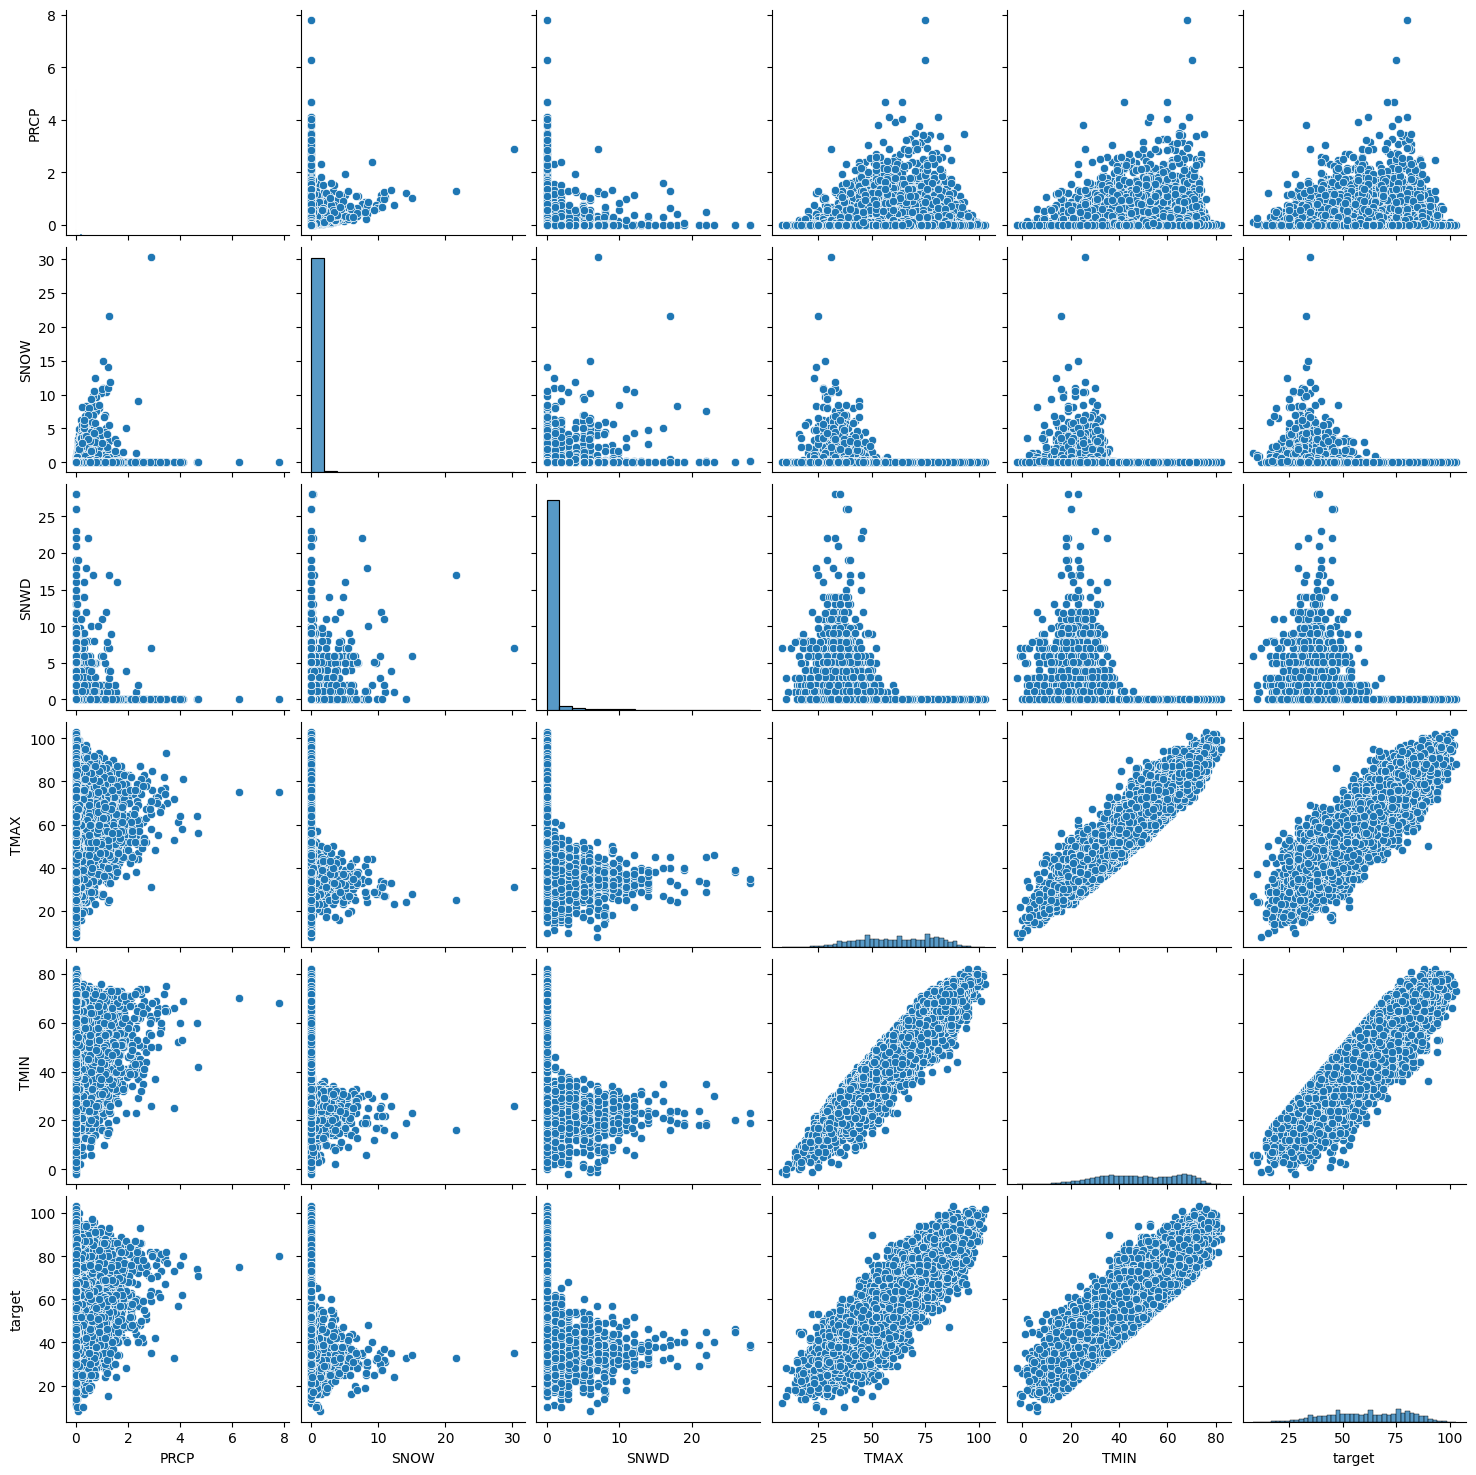

In [603]:
sns.pairplot(weather)

#### Plotting All the Column Values

Plotting all the column values to see what how the weather has changed over the years

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

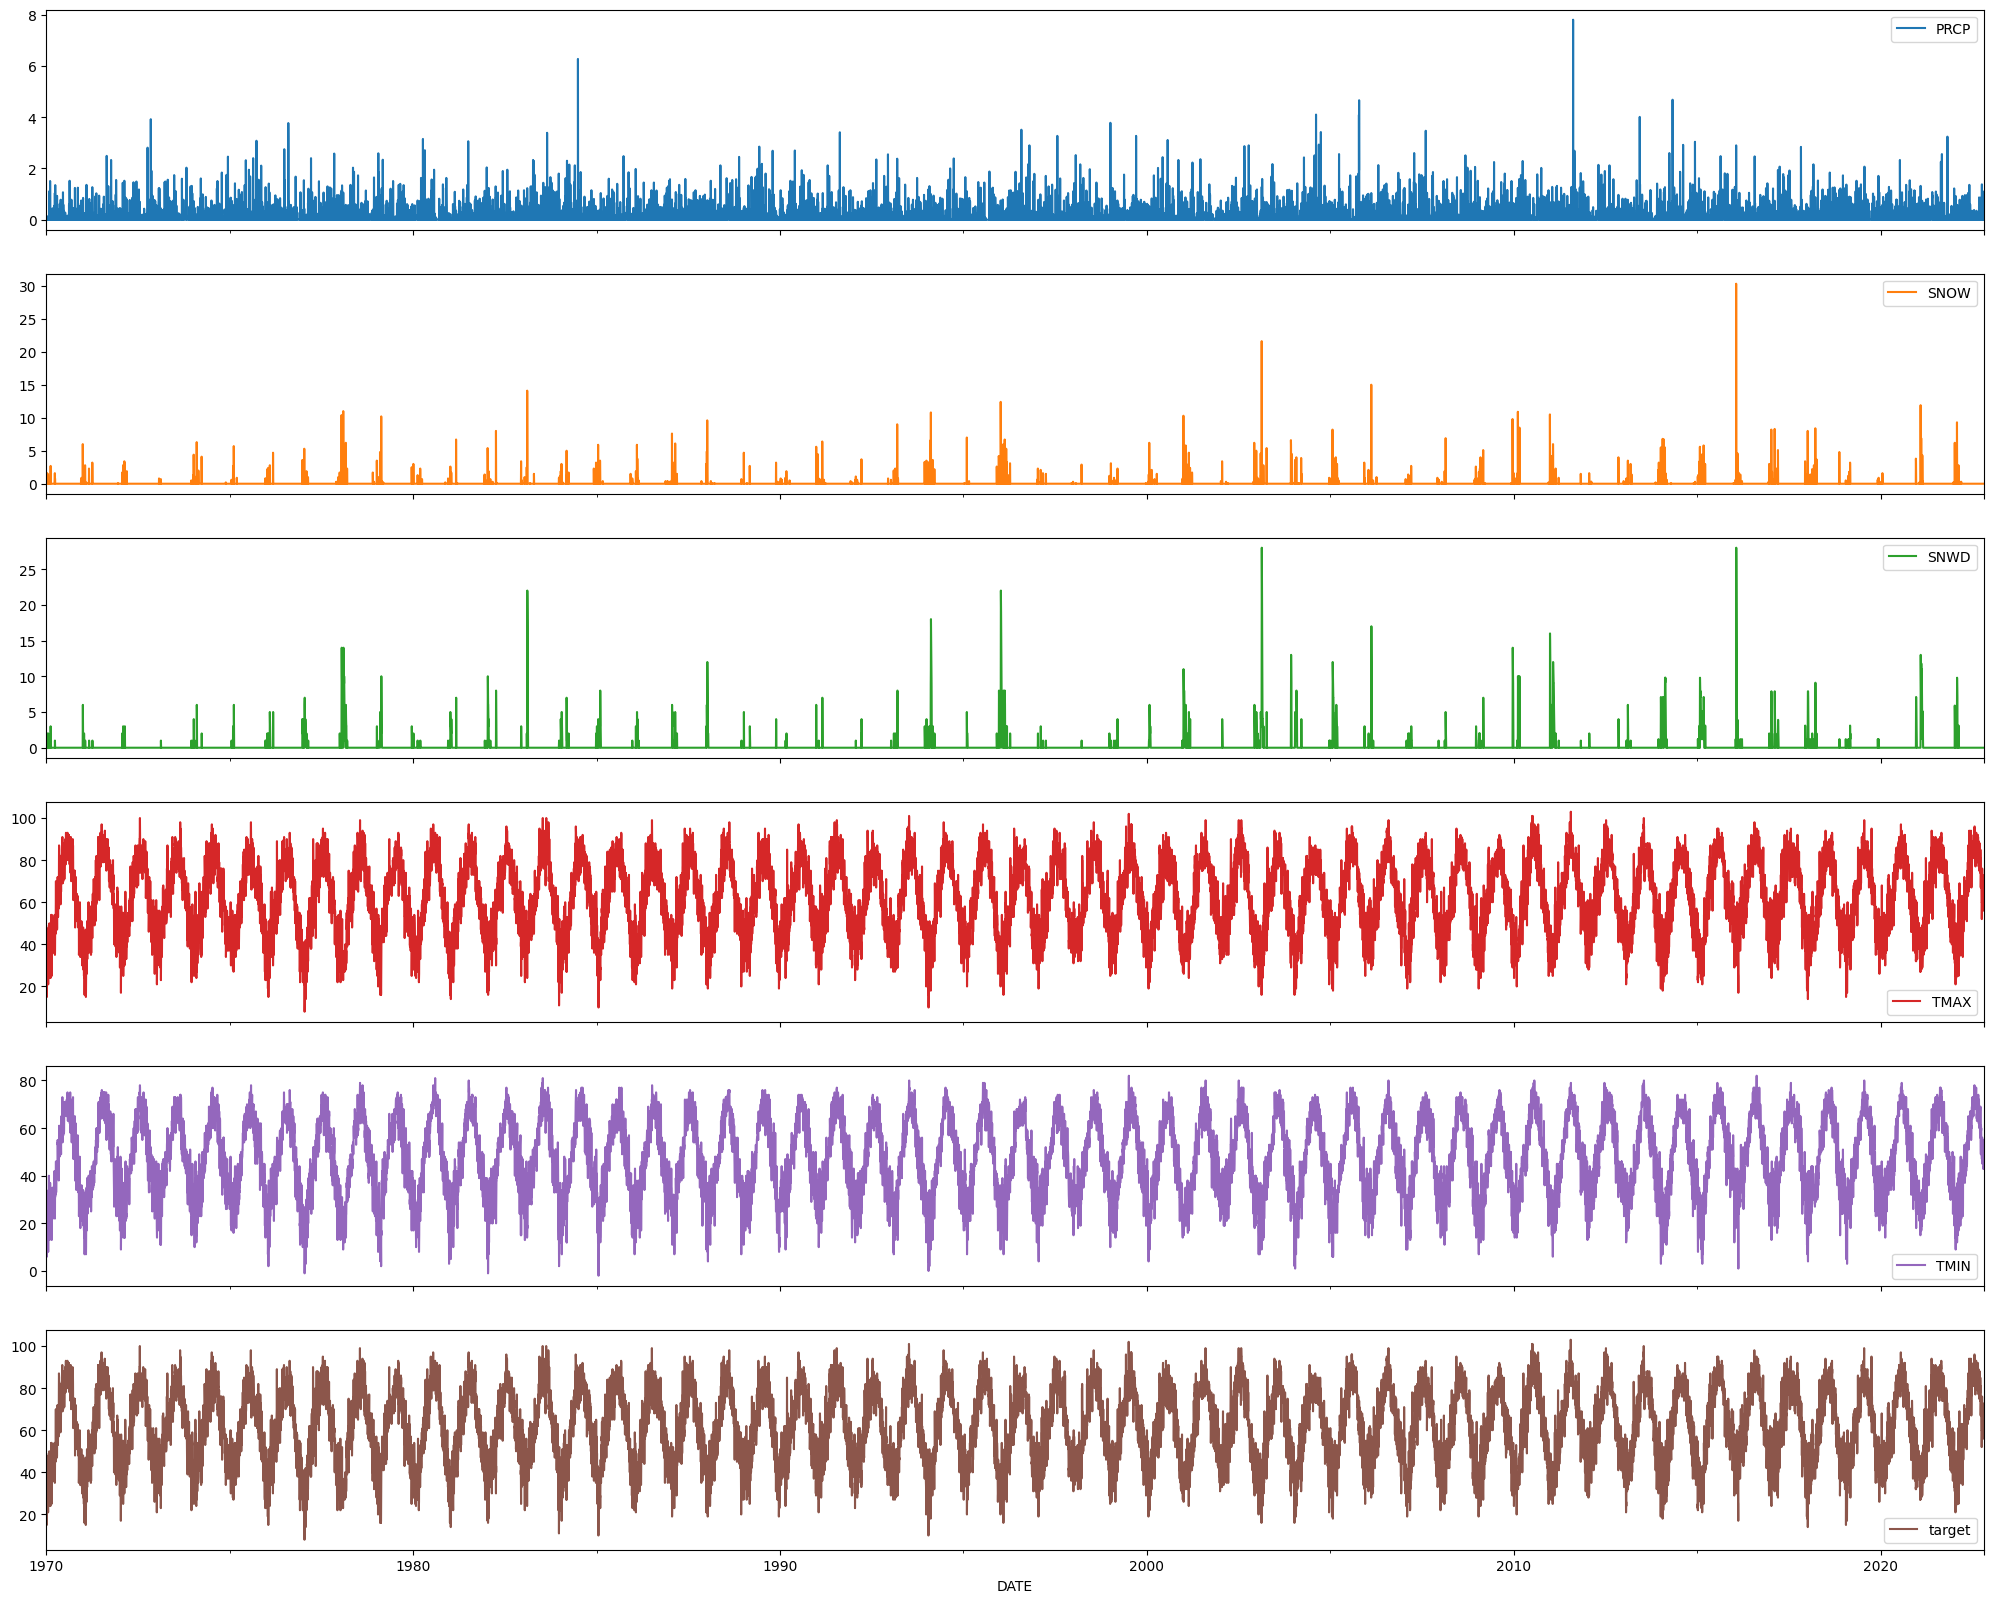

In [604]:
weather.plot(subplots=True, figsize=(25,20))

#### Plotting All the Data of 1 year

Plotting the data for 1 year to visualize the weather change over a year

array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>], dtype=object)

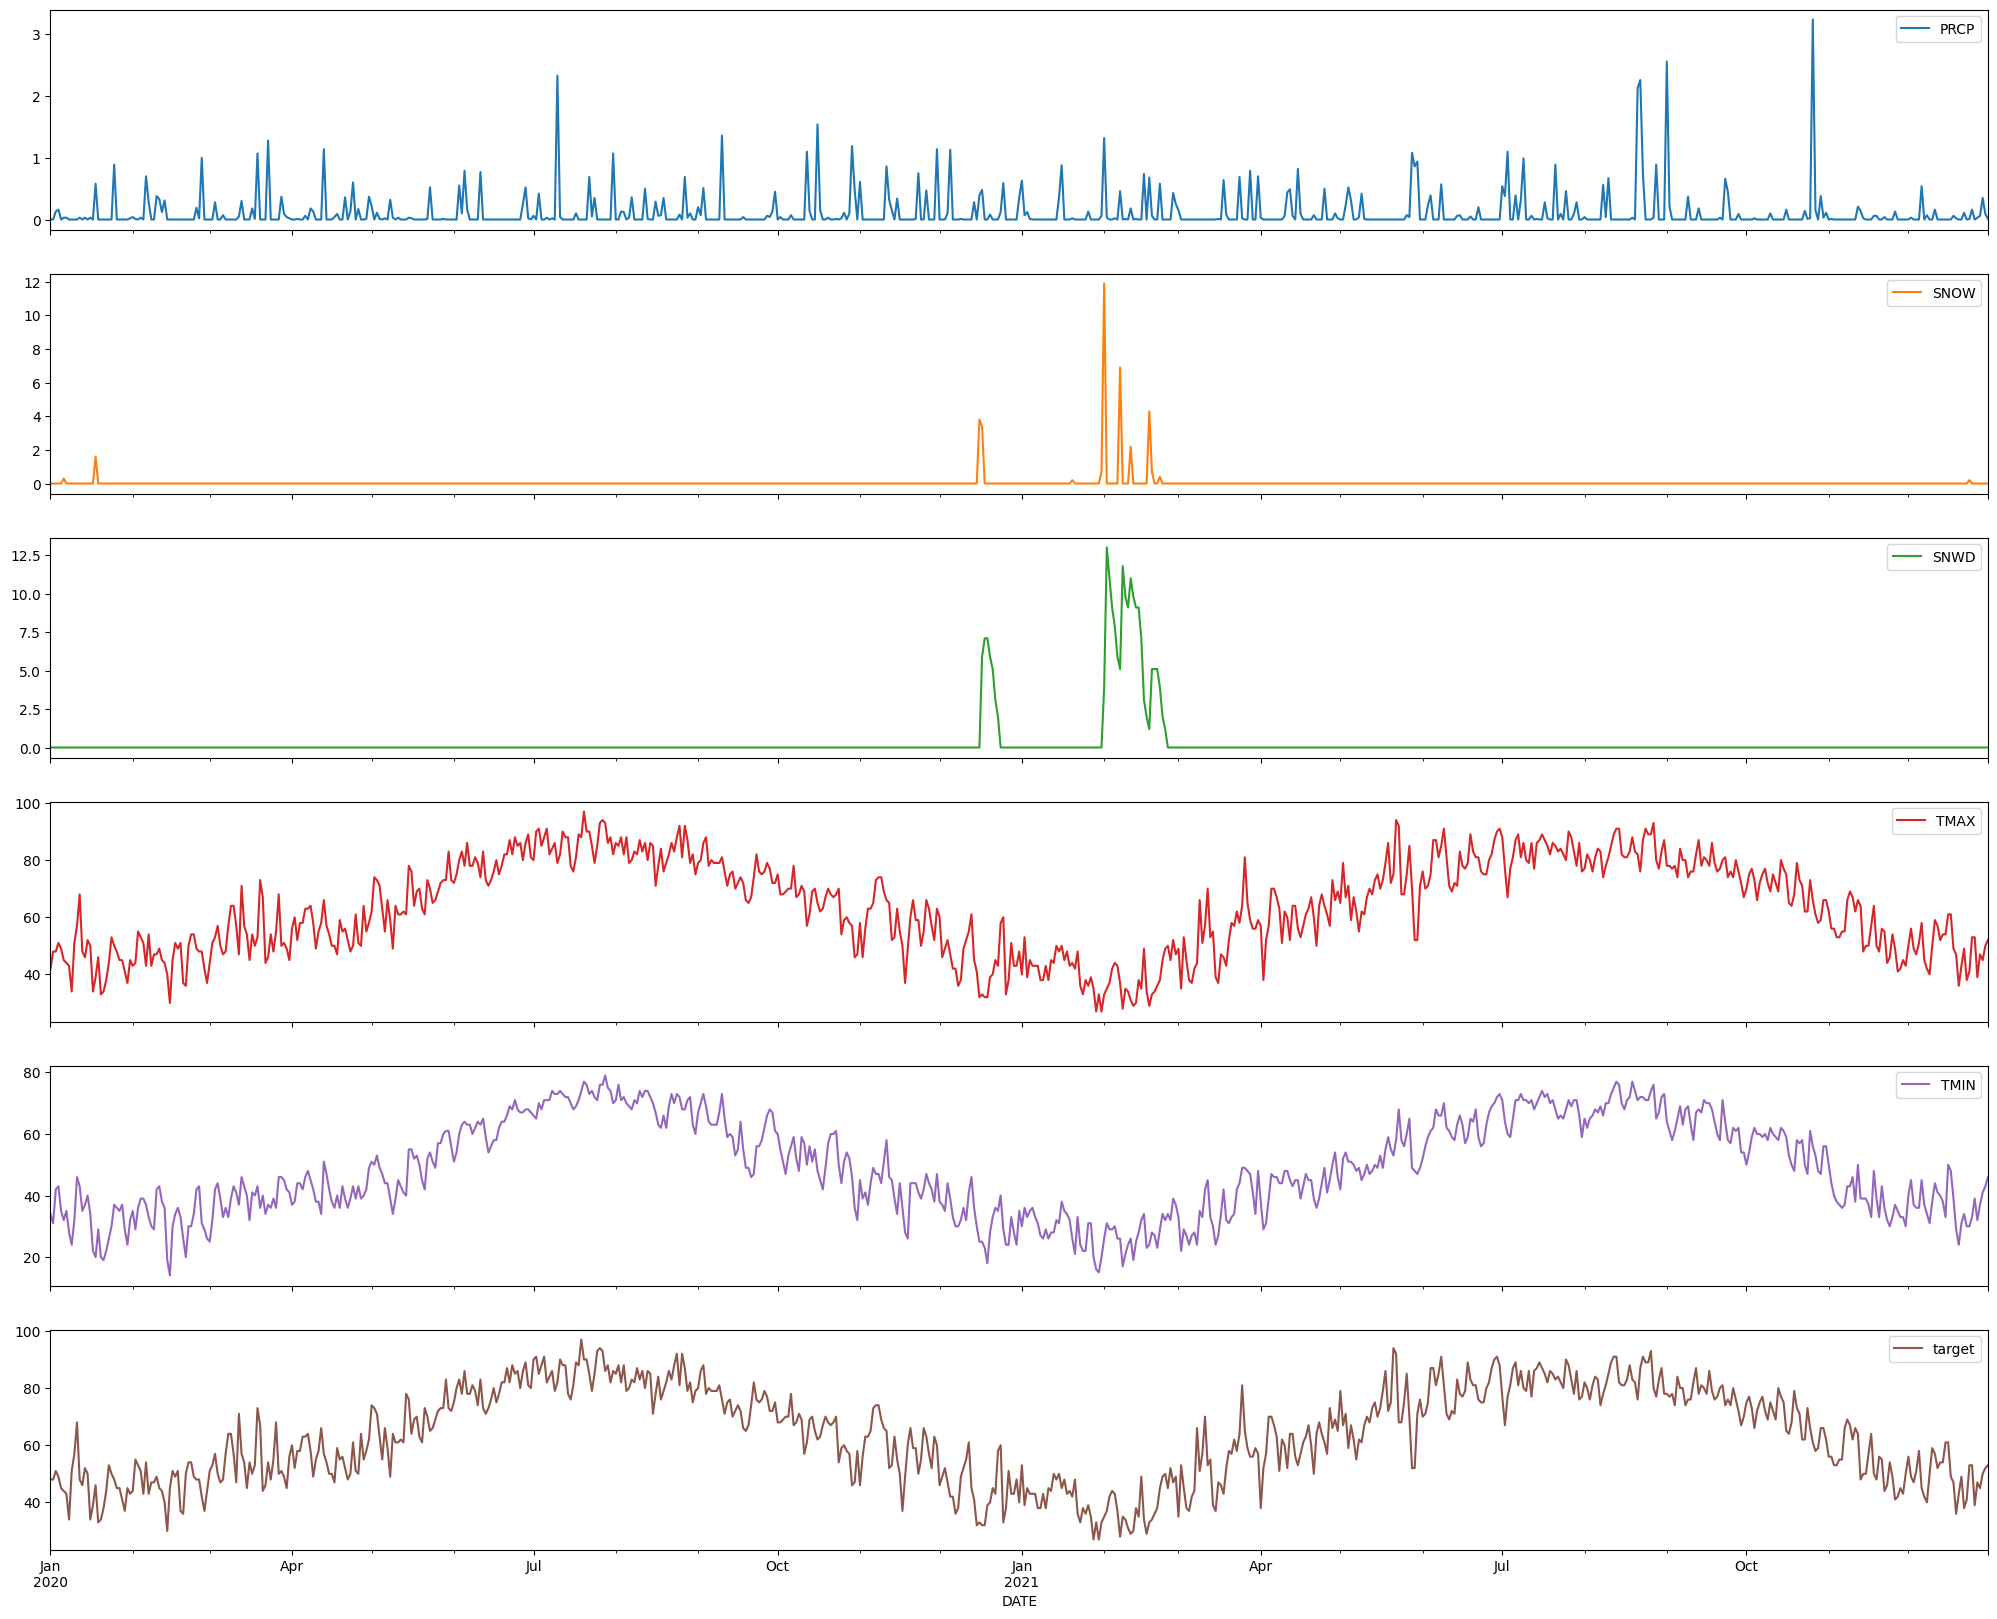

In [605]:
weather['2020':'2021'].plot(subplots=True, figsize=(25,20))

#### Temperature vs Year Scatterplot

### Model Fitting And Training

Now we will import our model from scikit learn website to train our model. Here, we will use linear regression model to predict the weather

In [606]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [607]:
linear_model = LinearRegression()

In [608]:
X = weather.iloc[:,2:7]
X

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1970-01-01,0.00,0.0,0.0,28,22
1970-01-02,0.00,0.0,0.0,31,22
1970-01-03,0.02,0.0,0.0,38,25
1970-01-04,0.00,0.0,0.0,31,23
1970-01-05,0.00,0.0,0.0,35,21
...,...,...,...,...,...
2022-10-17,0.08,0.0,0.0,67,54
2022-10-18,0.00,0.0,0.0,58,48
2022-10-19,0.00,0.0,0.0,56,43


In [609]:
y = weather.iloc[:,7]
y

DATE
1970-01-01    31.0
1970-01-02    38.0
1970-01-03    31.0
1970-01-04    35.0
1970-01-05    36.0
              ... 
2022-10-17    58.0
2022-10-18    56.0
2022-10-19    61.0
2022-10-20    64.0
2022-10-21    64.0
Name: target, Length: 19287, dtype: float64

In [610]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=4)
linear_model.fit(train_X,train_y)
prediction_lr = linear_model.predict(test_X)

In [611]:
for i in range(len(prediction_lr)):
  prediction_lr[i]=round(prediction_lr[i],4)
Prediction_lr = pd.DataFrame({'Actual':test_y,'Prediction':prediction_lr,'difference':(test_y-prediction_lr)})
Prediction_lr

,Actual,Prediction,difference
DATE,,,
2006-12-05,49.0,41.7376,7.2624
2018-05-03,78.0,77.7376,0.2624
1993-08-08,78.0,77.6222,0.3778
2016-06-27,76.0,79.9482,-3.9482
1993-12-10,50.0,54.3959,-4.3959
...,...,...,...
1995-04-06,60.0,44.3981,15.6019
1991-05-29,84.0,81.5317,2.4683
1981-01-02,22.0,36.0760,-14.0760


In [612]:
#Calculating Error
Prediction_lr["difference"].mean()

0.1517450492483152

<ipython-input-613-5254c52c8326>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Prediction_lr["2020":"2021"].plot(subplots=True, figsize=(25,20))


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

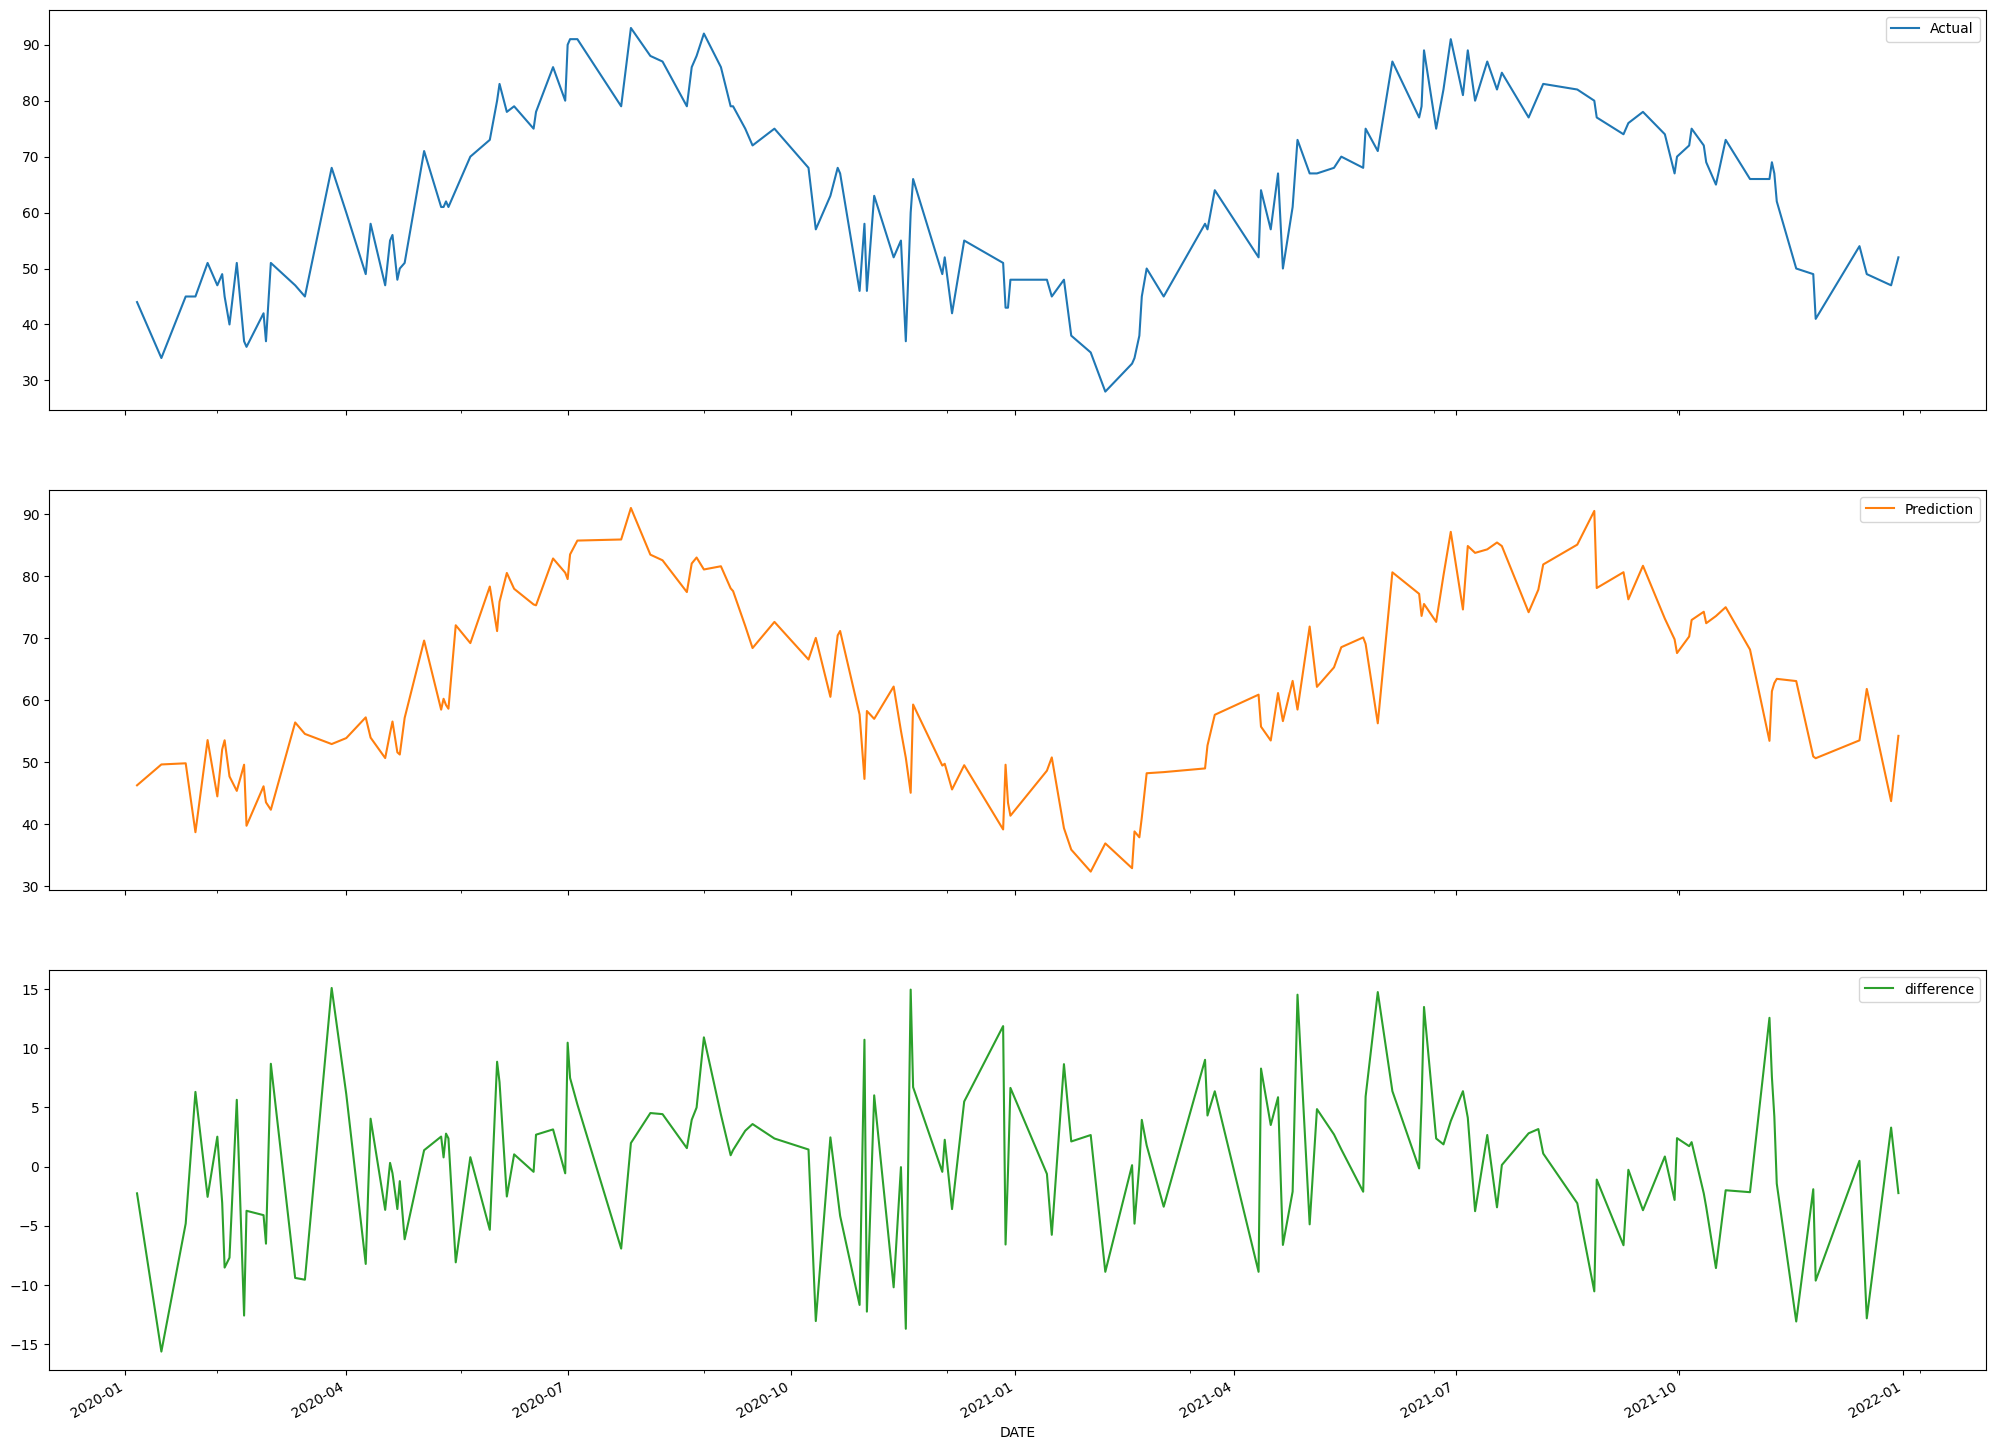

In [613]:
Prediction_lr["2020":"2021"].plot(subplots=True, figsize=(25,20))

In [614]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=100)
regressor.fit(train_X,train_y)

RandomForestRegressor(random_state=100)

In [615]:
predictions_f = regressor.predict(test_X)
predictions_f

array([45.23596032, 83.81788095, 77.8495    , ..., 36.73512446,
       84.06544686, 50.20333333])

In [616]:
for i in range(len(predictions_f)):
  predictions_f[i]=round(predictions_f[i],4)
Predictions_f = pd.DataFrame({'Actual':test_y,'Prediction':predictions_f,'difference':(test_y-predictions_f)})
Predictions_f

,Actual,Prediction,difference
DATE,,,
2006-12-05,49.0,45.2360,3.7640
2018-05-03,78.0,83.8179,-5.8179
1993-08-08,78.0,77.8495,0.1505
2016-06-27,76.0,78.0083,-2.0083
1993-12-10,50.0,53.3095,-3.3095
...,...,...,...
1995-04-06,60.0,44.8901,15.1099
1991-05-29,84.0,82.3073,1.6927
1981-01-02,22.0,36.7351,-14.7351


In [617]:
Predictions_f["difference"].mean()

0.18910352514256082

We can see that there is visible error in the predicted values, it is beacuse the data has multicollinearity, so linear regression model is not a great fit.

We can confirm the presence of multicollinearity by calculating Varience Inflation factor (VIF). It is a measure used to assess the extent of multicollinearity in a regression analysis. Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, leading to unreliable coefficient estimates and reduced interpretability of the model. Variance Inflation Factor (VIF) is a measure used to assess the impact of multicollinearity on the estimation of regression coefficients in a linear regression model.




> >  > > > 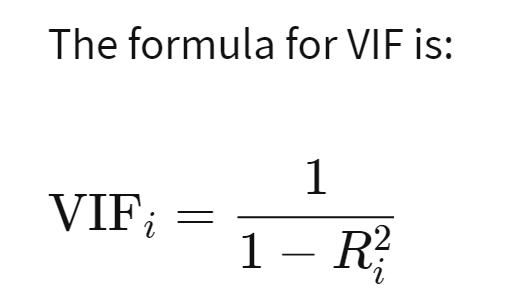







*   A VIF value of 1 indicates no multicollinearity, implying that the variable is not correlated with any other independent variable in the model.

*  VIF values greater than 1 and less than 5 generally indicate moderate multicollinearity. While some level of multicollinearity might be present, it is usually considered acceptable.
*   IF values greater than 5 or 10 (or even higher, depending on the context) suggest a high degree of multicollinearity and should raise concerns. At this level, the coefficient estimates can become highly unreliable.







In [618]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

weather_numerical_data = weather.iloc[:,2:8]
data_with_const = add_constant(weather_numerical_data)
vif_data = pd.DataFrame()
vif_data['Feature'] = data_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]
# Display the VIF DataFrame.
print(vif_data)

  Feature        VIF
0   const  20.566579
1    PRCP   1.070400
2    SNOW   1.101095
3    SNWD   1.117907
4    TMAX  13.394692
5    TMIN  13.653659
6  target   7.032364


The results of the Variance Inflation Factor (VIF) analysis indicate that there is no significant multicollinearity among the variables "PRCP," "SNOW," and "SNWD," as their VIF values are close to 1, suggesting little correlation between them. However, concerning the variables "TMAX" and "TMIN," their respective VIF values exceed 10, implying a high degree of multicollinearity between them. This multicollinearity between "TMAX" and "TMIN" may hinder the ability to interpret their individual effects on the target variable. To address this issue, we shpuld either further investigate , such as removing one of the highly correlated variables , but here , we can't do that , or implementing regularization techniques like Ridge regression or Lasso regression to mitigate its impact on the model's reliability and interpretability. Here, to address this issue, we can use ridge regression method , to remove the error

#### Ridge Regression

So in order to tackle multicollinearity, we have to use ridge regression model. And also declare a backtest function to tackle timeseries data

In [619]:
from sklearn.linear_model import Ridge

In [620]:
weather.corr()

<ipython-input-620-7abb8bc3d4be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr()


,PRCP,SNOW,SNWD,TMAX,TMIN,target
PRCP,1.000000,0.151051,0.001178,-0.007210,0.052279,-0.003358
SNOW,0.151051,1.000000,0.232567,-0.175075,-0.159285,-0.172737
SNWD,0.001178,0.232567,1.000000,-0.259858,-0.256977,-0.241054
TMAX,-0.007210,-0.175075,-0.259858,1.000000,0.955487,0.915296
TMIN,0.052279,-0.159285,-0.256977,0.955487,1.000000,0.915461
target,-0.003358,-0.172737,-0.241054,0.915296,0.915461,1.000000


<ipython-input-621-d9888a2ac0e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(),annot=True,linewidths=2)


<Axes: >

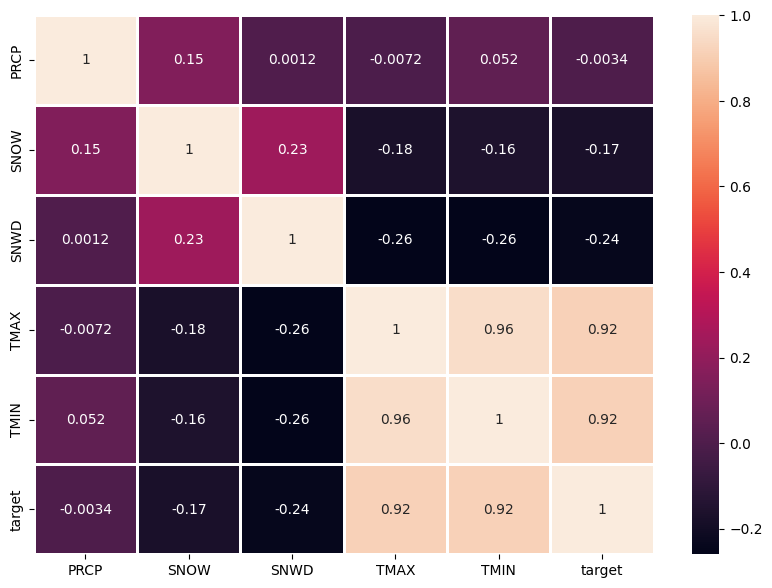

In [621]:
plt.figure(figsize=(10,7))
sns.heatmap(weather.corr(),annot=True,linewidths=2)

In [622]:
#initializing the model
model = Ridge(alpha = 57990)

In [623]:
model.fit(train_X, train_y)
predictions_r = model.predict(test_X)
predictions_r

array([41.62331824, 77.73556392, 77.41156153, ..., 36.25640876,
       83.58652656, 50.69129919])

In [624]:
for i in range(len(predictions_r)):
  predictions_r[i]=round(predictions_r[i],4)
Predictions_r = pd.DataFrame({'Actual':test_y,'Prediction':predictions_r,'difference':(test_y-predictions_r)})
Predictions_r.head(15)

,Actual,Prediction,difference
DATE,,,
2006-12-05,49.0,41.6233,7.3767
2018-05-03,78.0,77.7356,0.2644
1993-08-08,78.0,77.4116,0.5884
2016-06-27,76.0,79.7868,-3.7868
1993-12-10,50.0,54.5100,-4.5100
1999-05-07,60.0,63.1790,-3.1790
1995-05-25,62.0,72.1337,-10.1337
2006-05-08,62.0,64.5175,-2.5175
1975-01-21,41.0,33.8531,7.1469


In [625]:
Predictions_r["difference"].mean()

0.14604787454639717

In [626]:
Predictions_r['difference'].round().value_counts().sort_index()

-26.0      1
-21.0      2
-20.0      2
-19.0      3
-18.0      5
-17.0      4
-16.0     12
-15.0     19
-14.0     35
-13.0     48
-12.0     46
-11.0     56
-10.0     82
-9.0     102
-8.0      93
-7.0     117
-6.0     119
-5.0     148
-4.0     180
-3.0     224
-2.0     219
-1.0     253
 0.0     257
 1.0     234
 2.0     257
 3.0     223
 4.0     165
 5.0     180
 6.0     142
 7.0     121
 8.0     104
 9.0      97
 10.0     63
 11.0     52
 12.0     48
 13.0     31
 14.0     24
 15.0     25
 16.0     15
 17.0     14
 18.0      8
 19.0     10
 20.0      6
 21.0      4
 22.0      2
 23.0      2
 24.0      2
 26.0      1
 39.0      1
Name: difference, dtype: int64

We can see from the difference column  that our algorithm was pretty effective, as the differencee between actual value and predicted value is much less than linear regression model and random forest model.

Lets visulize the actual and predicted values

<ipython-input-627-78aadce603aa>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Predictions_r["2020":].plot(subplots=True, figsize=(25,20))


array([<Axes: xlabel='DATE'>, <Axes: xlabel='DATE'>,
       <Axes: xlabel='DATE'>], dtype=object)

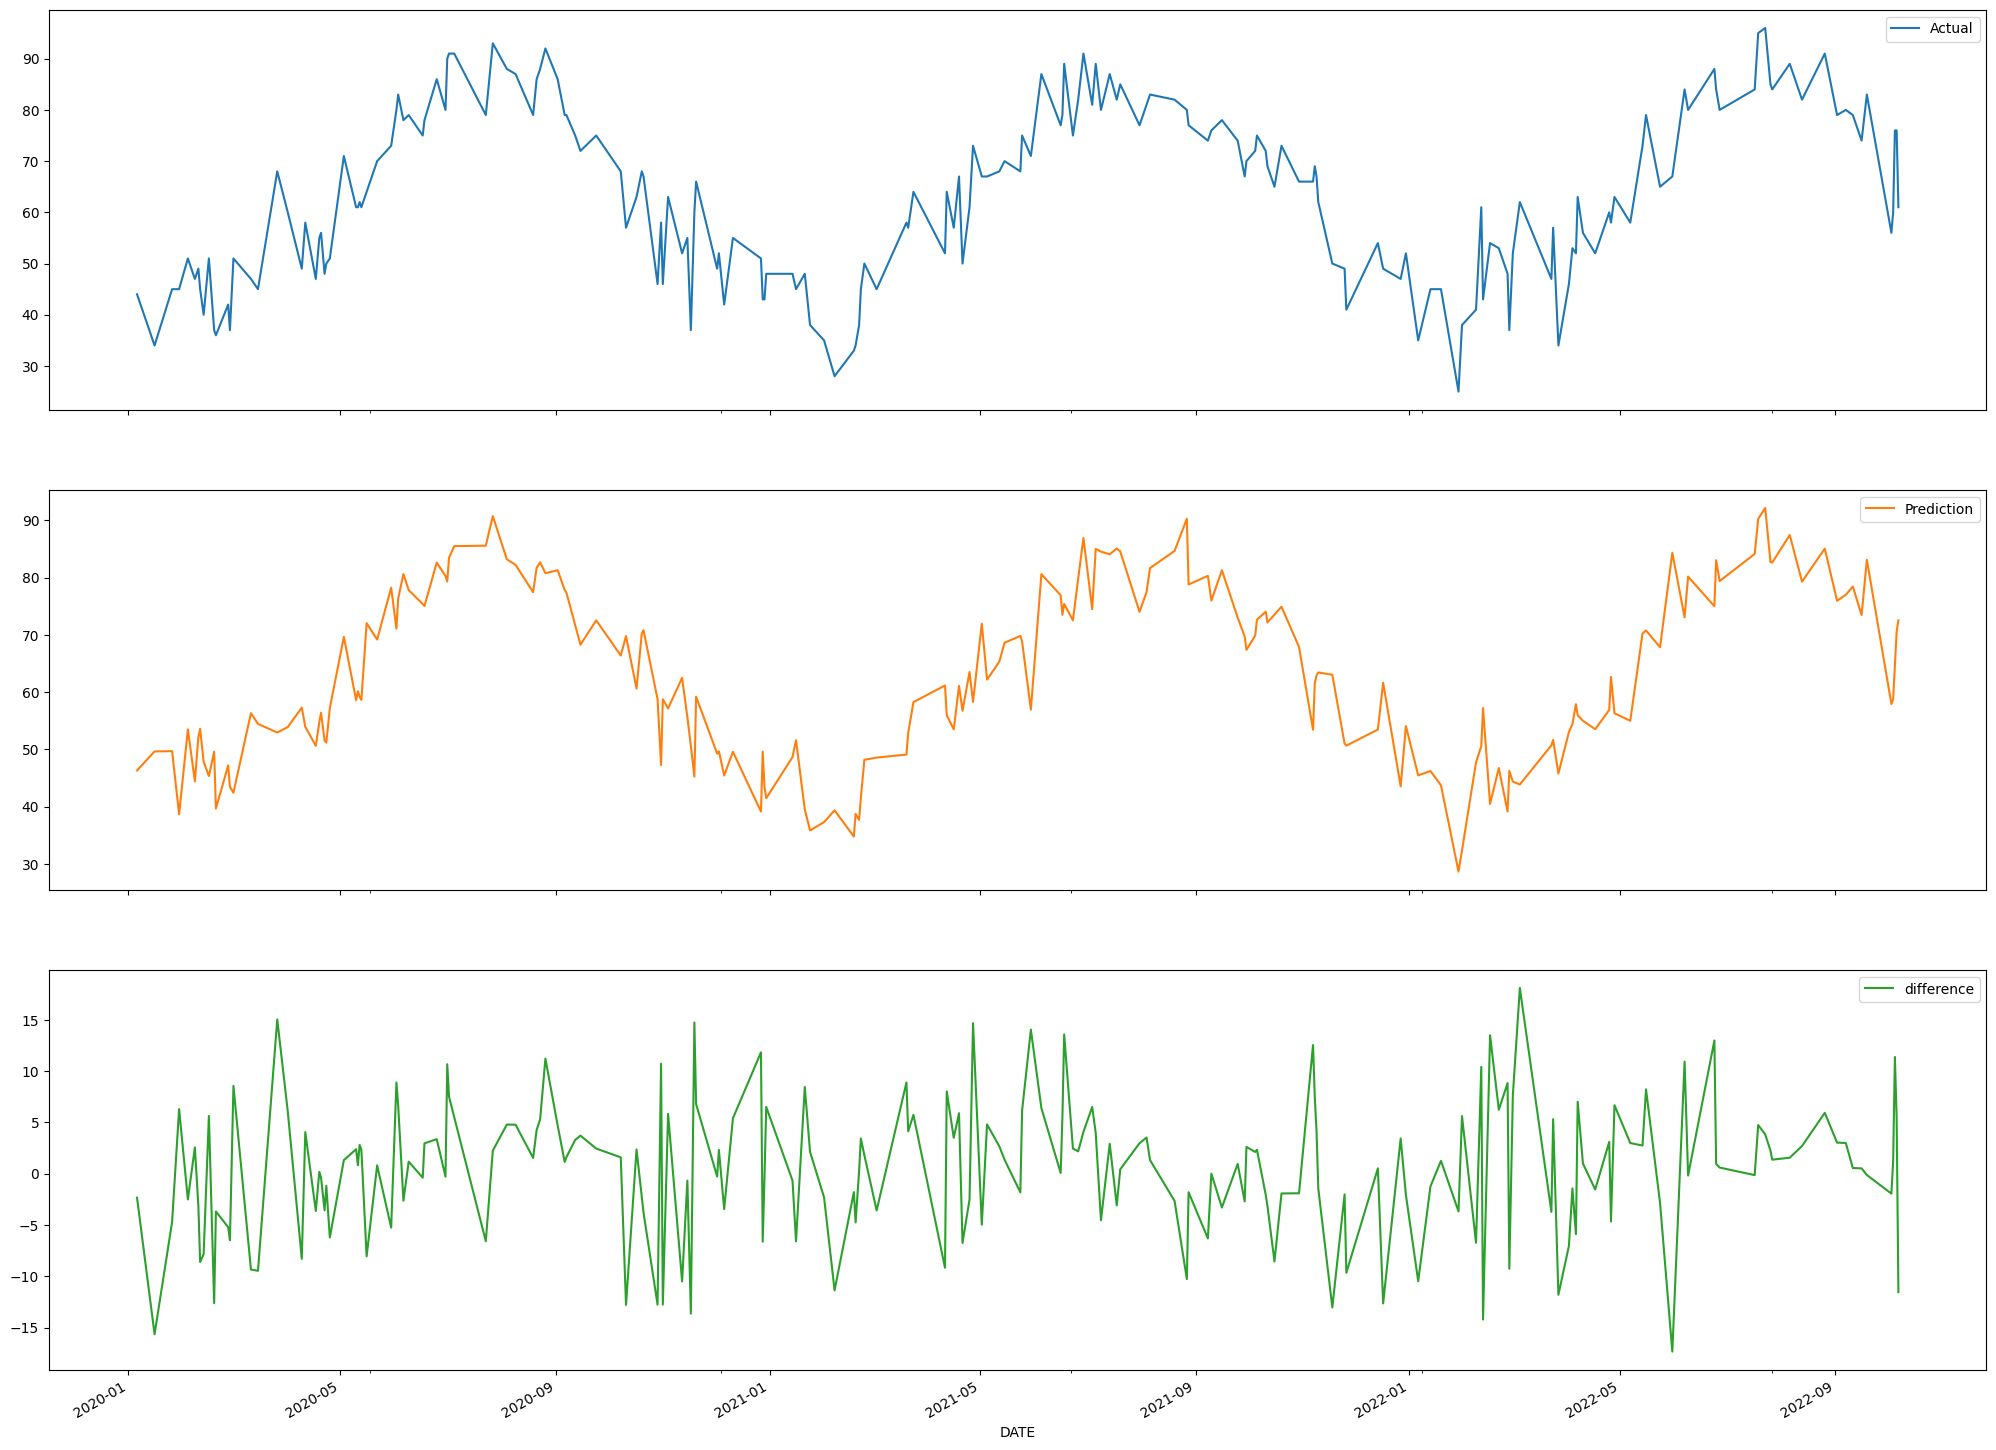

In [627]:
Predictions_r["2020":].plot(subplots=True, figsize=(25,20))

In [628]:
input = [0.17,0.0,0.0,36,25]
input_data_as_numpy_array = np.asarray(input[0:])
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped
prediction = model.predict(input_data_reshaped)
prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([38.72072569])

## Saving the Trained Model

Now we will use pickle to save the model in order to deploy it.


In [629]:
import pickle

Creating a file named trained_model , and opening with using wb (write binary) and dumping our model into it using pickle

In [630]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename,'wb'))

In [631]:
# loading the saved model using rb  (read binary)

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [632]:
input = [0.17,0.0,0.0,36,25]
input_data_as_numpy_array = np.asarray(input[0:])
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_reshaped
prediction = model.predict(input_data_reshaped)
prediction


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([38.72072569])